# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb

### LOAD DATA, CLEANING

In [3]:
# Read the data
df = pd.read_csv(r'C:\Users\Edbert Chandradinata\Downloads\healthcare_dataset.csv')
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [4]:
# // Data Cleaning, and Transformation
# // 1. Check for missing values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
# // 2. Drop the missing values --> tidak ada missing values
df.dropna(inplace=True)
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
# // 3. Check for duplicates --> tidak ada Duplicates
df.duplicated().sum()

0

In [7]:
# Check for outliers
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [8]:
# Drop outliers Sebenarnya tidak ada outliers
df = df[df['Age'] < 100]
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [9]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.2+

### TRANSFORMATION

In [10]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])


In [11]:
# Transform dates to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [12]:
# Feature engineering
df['Admission Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days


### VISUALIZATION (EDA)

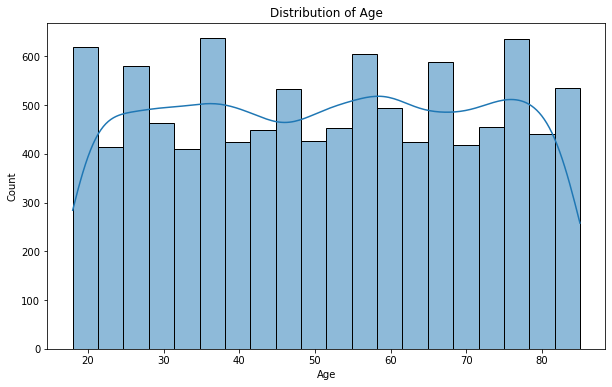

In [13]:
# Visualization (EDA)
# Example: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

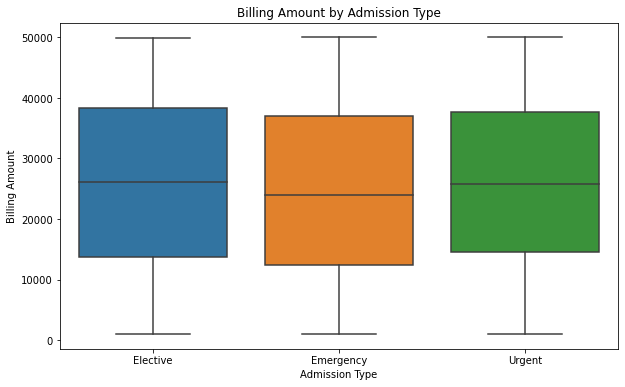

In [14]:
# Example: Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title('Billing Amount by Admission Type')
plt.show()

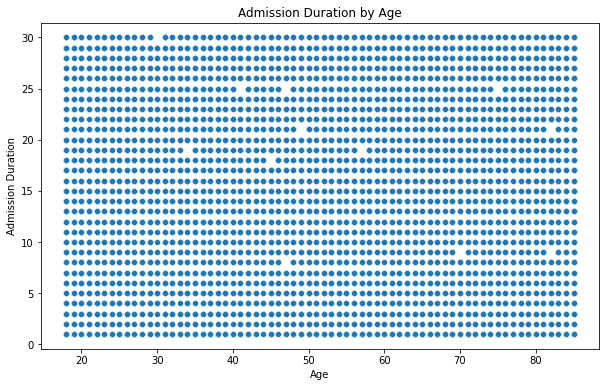

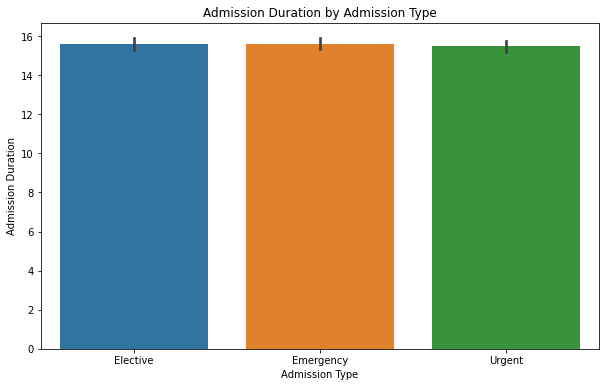

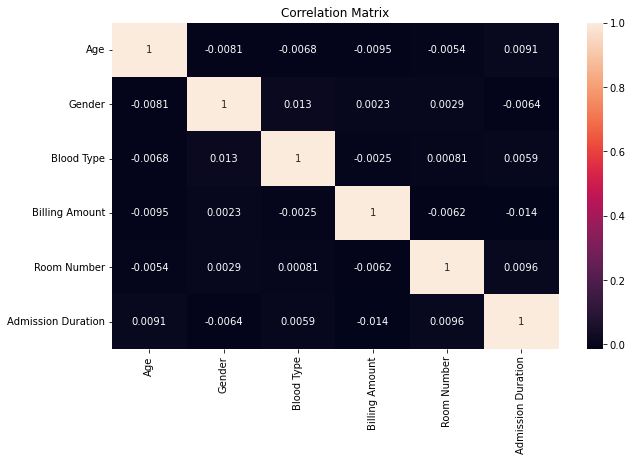

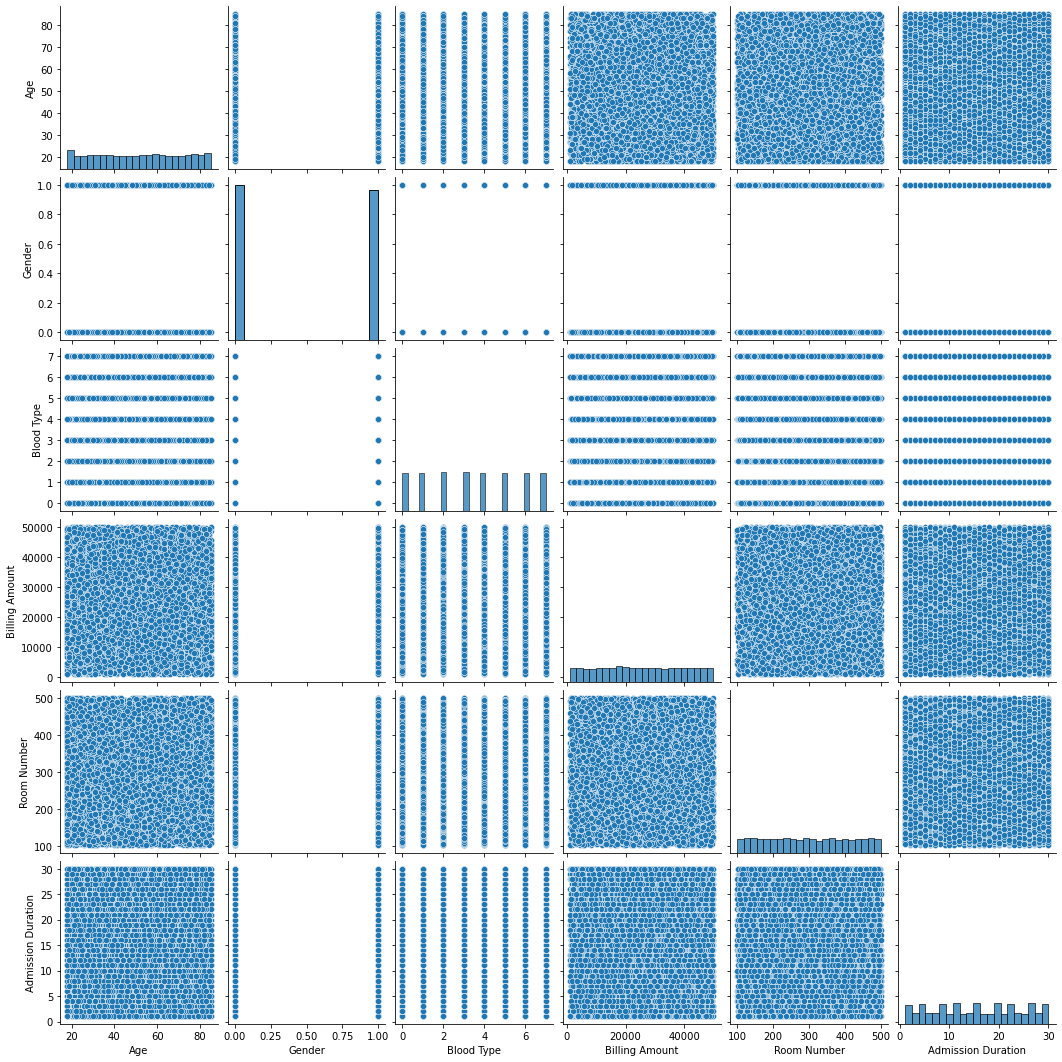

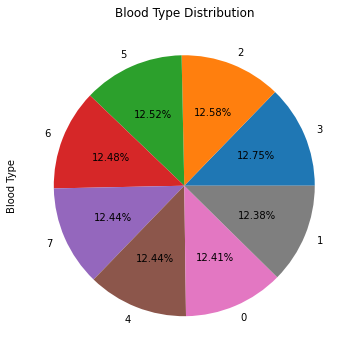

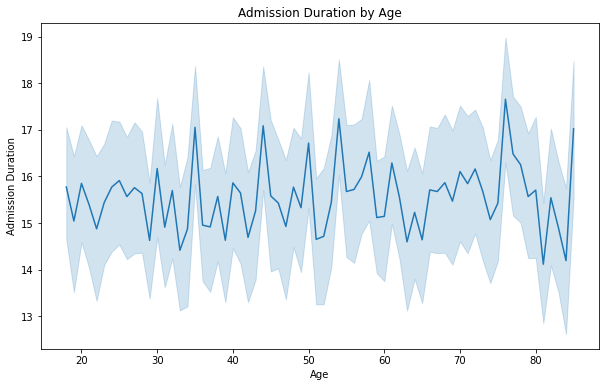

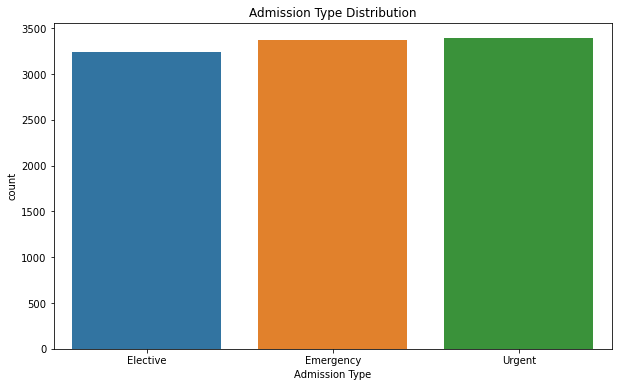

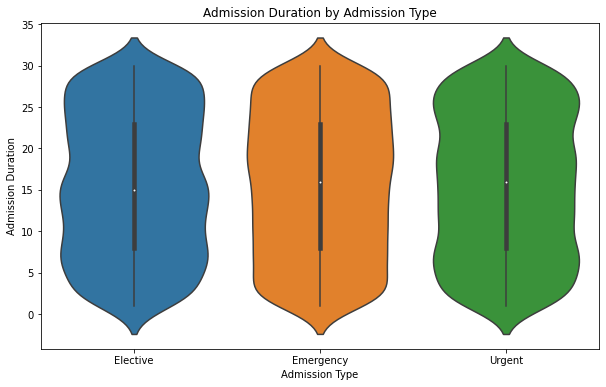

In [15]:
# Example: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Admission Duration', data=df)
plt.title('Admission Duration by Age')
plt.show()

# Example: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Admission Type', y='Admission Duration', data=df)
plt.title('Admission Duration by Admission Type')
plt.show()

# Example: Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Example: Pair plot
sns.pairplot(df)
plt.show()

# Example: Pie chart
plt.figure(figsize=(10, 6))
df['Blood Type'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Blood Type Distribution')
plt.show()

# Example: Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Admission Duration', data=df)
plt.title('Admission Duration by Age')
plt.show()

# Example: Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type Distribution')
plt.show()

# Example: Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Admission Type', y='Admission Duration', data=df)
plt.title('Admission Duration by Admission Type')
plt.show()

### USE AT LASAT ONE MACHINE LEARNING TECHNIQUES (Regression, Classification, Clustering)
### USE DIFFERENT MODELLING ALGORITHM TO COMPARE RESULTS (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)


In [16]:
# 3. Machine Learning Techniques
# Regression
X_reg = df[['Age', 'Gender', 'Blood Type', 'Admission Duration']]
y_reg = df['Billing Amount']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [17]:
# Classification
X_class = df[['Age', 'Gender', 'Blood Type']]
y_class = df['Admission Type']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Logistic Regression
class_model = LogisticRegression()
class_model.fit(X_train_class, y_train_class)
class_pred = class_model.predict(X_test_class)
class_accuracy = accuracy_score(y_test_class, class_pred)
print(f'Logistic Regression Accuracy: {class_accuracy}')

Logistic Regression Accuracy: 0.326


In [18]:
rf_class_model = RandomForestClassifier()
rf_class_model.fit(X_train_class, y_train_class)
rf_class_pred = rf_class_model.predict(X_test_class)
rf_class_accuracy = accuracy_score(y_test_class, rf_class_pred)
print(f'Random Forest Classification Accuracy: {rf_class_accuracy}')

Random Forest Classification Accuracy: 0.316


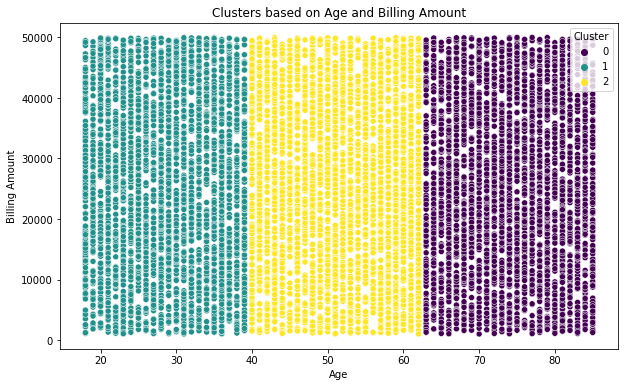

In [19]:
# Clustering
X_cluster = df[['Age', 'Gender', 'Blood Type']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Billing Amount', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Age and Billing Amount')
plt.show()

In [20]:
# 4. Modelling Algorithms - XGBoost
X_xgb = df[['Age', 'Gender', 'Blood Type', 'Admission Duration']]
y_xgb = df['Billing Amount']
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_xgb, y_train_xgb)
xgb_pred = xgb_model.predict(X_test_xgb)
xgb_mse = mean_squared_error(y_test_xgb, xgb_pred)
print(f'XGBoost Regression Mean Squared Error: {xgb_mse}')

XGBoost Regression Mean Squared Error: 225454699.15437585


In [21]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_xgb, y_train_xgb)
knn_pred = knn_model.predict(X_test_xgb)
knn_mse = mean_squared_error(y_test_xgb, knn_pred)
print(f'KNN Regression Mean Squared Error: {knn_mse}')

KNN Regression Mean Squared Error: 244137736.1443187


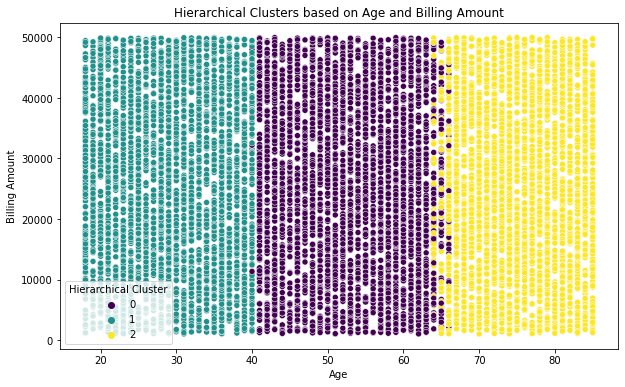

In [22]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hier_cluster = AgglomerativeClustering(n_clusters=3)
df['Hierarchical Cluster'] = hier_cluster.fit_predict(X_cluster)

# Visualize Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Billing Amount', hue='Hierarchical Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clusters based on Age and Billing Amount')
plt.show()

In [23]:
# Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
reg_pred = reg_model.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, reg_pred)
print(f'Linear Regression Mean Squared Error: {reg_mse}')

Linear Regression Mean Squared Error: 199984829.63506258


In [24]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train_reg, y_train_reg)
rf_pred = rf_model.predict(X_test_reg)
rf_mse = mean_squared_error(y_test_reg, rf_pred)
print(f'Random Forest Regression Mean Squared Error: {rf_mse}')

Random Forest Regression Mean Squared Error: 240139911.75148675
